In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
df_poblT = pd.read_csv('Data/WPP2019_TotalPopulationBySex.csv')
df_poblT

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
280927,716,Zimbabwe,207,Lower 95 PI,2080,2080.5,10576.533,11255.983,21836.893,56.448
280928,716,Zimbabwe,207,Lower 95 PI,2085,2085.5,10293.349,11050.875,21355.988,55.205
280929,716,Zimbabwe,207,Lower 95 PI,2090,2090.5,9920.336,10767.709,20689.956,53.483
280930,716,Zimbabwe,207,Lower 95 PI,2095,2095.5,9503.711,10412.184,19892.080,51.421


1.  ¿Qué países tienen datos faltantes?
2.  ¿Cuál es la tasa de crecimiento poblacional anual media para todos los países en el intervalo 2000-2020?
3. ¿Cuáles son los 10 países que tienen mayor tasa de crecimiento poblacional anual media en ese periodo? ¿Y los que tienen la menor? (Ojo! Por ahora, sólo considerar los países para los que tenemos datos completos para el periodo indicado)
4.¿Podría presentar algunas gráficas descriptivas? 
  * Población anual argentina en el periodo 2000-2020
  * Lo mismo que antes pero discriminando varones y mujeres
  * Si sólo consideramos argentina y sus países limítrofes: ¿podríamos hacer un gráfico que represente la "proporción" que cada uno lleva con su población actual? ¿Qué tipo de gráfico les parece que sería adecuado para representar esa información?

Analiza el archivo manualmente de varias formas y verificar que tipo de codificacion

In [12]:
df_poblT.columns

Index(['LocID', 'Location', 'VarID', 'Variant', 'Time', 'MidPeriod', 'PopMale',
       'PopFemale', 'PopTotal', 'PopDensity'],
      dtype='object')

In [13]:
df_poblT.index

RangeIndex(start=0, stop=280932, step=1)

In [14]:
df_poblT.dtypes

LocID           int64
Location       object
VarID           int64
Variant        object
Time            int64
MidPeriod     float64
PopMale       float64
PopFemale     float64
PopTotal      float64
PopDensity    float64
dtype: object

In [15]:
df_poblT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280932 entries, 0 to 280931
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   LocID       280932 non-null  int64  
 1   Location    280932 non-null  object 
 2   VarID       280932 non-null  int64  
 3   Variant     280932 non-null  object 
 4   Time        280932 non-null  int64  
 5   MidPeriod   280932 non-null  float64
 6   PopMale     250876 non-null  float64
 7   PopFemale   250876 non-null  float64
 8   PopTotal    280932 non-null  float64
 9   PopDensity  280932 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 21.4+ MB


Hice que cuente todas las columnas y me devuelva todas aquellas que estan llenas. de esta forma me doy cuenta que en PopMale y PopFemale hay datos faltantes

In [16]:
df_poblT.isnull().any()

LocID         False
Location      False
VarID         False
Variant       False
Time          False
MidPeriod     False
PopMale        True
PopFemale      True
PopTotal      False
PopDensity    False
dtype: bool

Me quedo con la variante Medium ya que es la mas completa y reduzco mi analisis a menos paises

In [17]:
df_poblT = df_poblT.loc[(df_poblT['Variant'] == 'Medium')& (df_poblT['LocID'] <= 500 )]
df_poblT

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
...,...,...,...,...,...,...,...,...,...,...
236831,275,State of Palestine,2,Medium,2096,2096.5,6175.152,6016.180,12191.332,2025.138
236832,275,State of Palestine,2,Medium,2097,2097.5,6186.855,6026.994,12213.849,2028.879
236833,275,State of Palestine,2,Medium,2098,2098.5,6197.416,6036.784,12234.200,2032.259
236834,275,State of Palestine,2,Medium,2099,2099.5,6206.801,6045.518,12252.319,2035.269


##1.  ¿Qué países tienen datos faltantes?


In [18]:
df_poblT2 = df_poblT.loc[(df_poblT['PopMale'].isna()==True) & (df_poblT['PopFemale'].isna()==True)]
df_poblT2

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
4744,16,American Samoa,2,Medium,1950,1950.5,NaN,NaN,18.941,94.705
4745,16,American Samoa,2,Medium,1951,1951.5,NaN,NaN,19.287,96.435
4746,16,American Samoa,2,Medium,1952,1952.5,NaN,NaN,19.546,97.730
4747,16,American Samoa,2,Medium,1953,1953.5,NaN,NaN,19.699,98.495
4748,16,American Samoa,2,Medium,1954,1954.5,NaN,NaN,19.758,98.790
...,...,...,...,...,...,...,...,...,...,...
166325,500,Montserrat,2,Medium,2096,2096.5,NaN,NaN,2.952,29.520
166326,500,Montserrat,2,Medium,2097,2097.5,NaN,NaN,2.930,29.300
166327,500,Montserrat,2,Medium,2098,2098.5,NaN,NaN,2.911,29.110
166328,500,Montserrat,2,Medium,2099,2099.5,NaN,NaN,2.891,28.910


In [19]:
a = set(df_poblT2['Location'])# para ver aquellos paises que les faltan datos
print(a)

{'Montserrat', 'Andorra', 'Cayman Islands', 'Liechtenstein', 'Bermuda', 'American Samoa', 'Cook Islands', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Holy See', 'Monaco', 'Greenland', 'Dominica', 'Gibraltar', 'British Virgin Islands'}


##2.¿Cuál es la tasa de crecimiento poblacional anual media para todos los países en el intervalo 2000-2020?

1.   crear un df con el intervalo del 2000 al 2020 de todos los paises
2. Usar un shift para hacer que todos los valores de la columna 'PopTotal' bajen una fila 
3. Antes del shift separa por grupos para que los valores de la pob total de el pais que no corresponde se mezcle con la de otros paises
2.   luego introducir esos datos a una funcion para calcular la tasa
3.   crear una nueva columna con la tasa en este df 


In [20]:
#Cree el DF se guarda unicamente las filas que cumplen con la condicion de estar entre 2000 y 2021
df_Intervalo = df_poblT.loc[(df_poblT['Time'] >= 2000) & (df_poblT['Time'] < 2021) ]
df_Intervalo

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
50,4,Afghanistan,2,Medium,2000,2000.5,10689.508,10090.449,20779.957,31.829
51,4,Afghanistan,2,Medium,2001,2001.5,11117.754,10489.238,21606.992,33.096
52,4,Afghanistan,2,Medium,2002,2002.5,11642.106,10958.668,22600.774,34.618
53,4,Afghanistan,2,Medium,2003,2003.5,12214.634,11466.237,23680.871,36.273
54,4,Afghanistan,2,Medium,2004,2004.5,12763.726,11962.963,24726.689,37.874
...,...,...,...,...,...,...,...,...,...,...
236751,275,State of Palestine,2,Medium,2016,2016.5,2352.012,2283.632,4635.644,770.041
236752,275,State of Palestine,2,Medium,2017,2017.5,2408.294,2338.939,4747.233,788.577
236753,275,State of Palestine,2,Medium,2018,2018.5,2466.617,2396.361,4862.978,807.804
236754,275,State of Palestine,2,Medium,2019,2019.5,2526.350,2455.072,4981.422,827.479


In [21]:
df_Intervalo['PopTotalShifteada'] = df_Intervalo.groupby('Location')['PopTotal'].shift()# hago el shift para poder hacer el siguiente calculo
# este es el calculo del procentaje de crecimiento anual poblacional de cada pais y lo agrego en la nueva columna tasa de crecimiento
df_Intervalo['%TasaDeCrecimiento'] = ((df_Intervalo['PopTotal'] / df_Intervalo['PopTotalShifteada'])- 1)*100 
df_Intervalo

C:\Users\gino_\AppData\Local\Temp\ipykernel_18452\3887512774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Intervalo['PopTotalShifteada'] = df_Intervalo.groupby('Location')['PopTotal'].shift()# hago el shift para poder hacer el siguiente calculo
C:\Users\gino_\AppData\Local\Temp\ipykernel_18452\3887512774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Intervalo['%TasaDeCrecimiento'] = ((df_Intervalo['PopTotal'] / df_Intervalo['PopTotalShifteada'])- 1)*100


,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,PopTotalShifteada,%TasaDeCrecimiento
50,4,Afghanistan,2,Medium,2000,2000.5,10689.508,10090.449,20779.957,31.829,NaN,NaN
51,4,Afghanistan,2,Medium,2001,2001.5,11117.754,10489.238,21606.992,33.096,20779.957,3.979965
52,4,Afghanistan,2,Medium,2002,2002.5,11642.106,10958.668,22600.774,34.618,21606.992,4.599354
53,4,Afghanistan,2,Medium,2003,2003.5,12214.634,11466.237,23680.871,36.273,22600.774,4.779027
54,4,Afghanistan,2,Medium,2004,2004.5,12763.726,11962.963,24726.689,37.874,23680.871,4.416299
...,...,...,...,...,...,...,...,...,...,...,...,...
236751,275,State of Palestine,2,Medium,2016,2016.5,2352.012,2283.632,4635.644,770.041,4529.160,2.351076
236752,275,State of Palestine,2,Medium,2017,2017.5,2408.294,2338.939,4747.233,788.577,4635.644,2.407195
236753,275,State of Palestine,2,Medium,2018,2018.5,2466.617,2396.361,4862.978,807.804,4747.233,2.438157
236754,275,State of Palestine,2,Medium,2019,2019.5,2526.350,2455.072,4981.422,827.479,4862.978,2.435627


##3.¿Cuáles son los 10 países que tienen mayor tasa de crecimiento poblacional anual media en ese periodo? ¿Y los que tienen la menor?
¿Cuáles son los 10 países que tienen mayor tasa de crecimiento poblacional anual media en ese periodo? ¿Y los que tienen la menor? (Ojo! Por ahora, sólo considerar los países para los que tenemos datos completos para el periodo indicado)

In [22]:
df_Porcentaje = df_Intervalo.groupby('Location')['%TasaDeCrecimiento'].sum()
df_Porcentaje.sort_values(ascending=False).head(10)

Location
Bahrain                             96.653026
Equatorial Guinea                   85.717552
Kuwait                              75.302872
Angola                              70.770032
Jordan                              70.321298
Chad                                68.754825
Maldives                            67.175276
Democratic Republic of the Congo    65.298135
Afghanistan                         63.825920
Burundi                             63.262451
Name: %TasaDeCrecimiento, dtype: float64

In [23]:
df_Porcentaje.sort_values(ascending=False).tail(10)

Location
Estonia                   -5.310422
Hungary                   -5.628613
Greece                    -6.109023
Croatia                   -7.551915
Albania                   -8.347477
Georgia                   -8.909869
Bosnia and Herzegovina   -13.311240
Bulgaria                 -14.016932
Latvia                   -23.290883
Lithuania                -25.018743
Name: %TasaDeCrecimiento, dtype: float64

##4.¿Podría presentar algunas gráficas descriptivas?
1. Población anual argentina en el periodo 2000-2020
2. Lo mismo que antes pero discriminando varones y mujeres
3. Si sólo consideramos argentina y sus países limítrofes: ¿podríamos hacer un gráfico que represente la "proporción" que cada uno lleva con su población actual? ¿Qué tipo de gráfico les parece que sería adecuado para representar esa información?


In [24]:
#Primero separemos los datos
Arg = df_poblT[(df_poblT['Location'] == 'Argentina') & (df_poblT['Time']>=2000) & (df_poblT['Time']<=2020)]
Arg

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
9365,32,Argentina,2,Medium,2000,2000.5,17894.725,18976.071,36870.796,13.473
9366,32,Argentina,2,Medium,2001,2001.5,18090.636,19185.008,37275.644,13.621
9367,32,Argentina,2,Medium,2002,2002.5,18290.786,19390.957,37681.743,13.769
9368,32,Argentina,2,Medium,2003,2003.5,18493.545,19594.321,38087.866,13.917
9369,32,Argentina,2,Medium,2004,2004.5,18696.321,19795.649,38491.970,14.065
9370,32,Argentina,2,Medium,2005,2005.5,18897.365,19995.559,38892.924,14.212
9371,32,Argentina,2,Medium,2006,2006.5,19095.976,20193.900,39289.876,14.357
9372,32,Argentina,2,Medium,2007,2007.5,19293.169,20391.134,39684.303,14.501
9373,32,Argentina,2,Medium,2008,2008.5,19490.949,20589.210,40080.159,14.645
9374,32,Argentina,2,Medium,2009,2009.5,19692.182,20790.604,40482.786,14.793


<AxesSubplot: xlabel='Time', ylabel='PopTotal'>

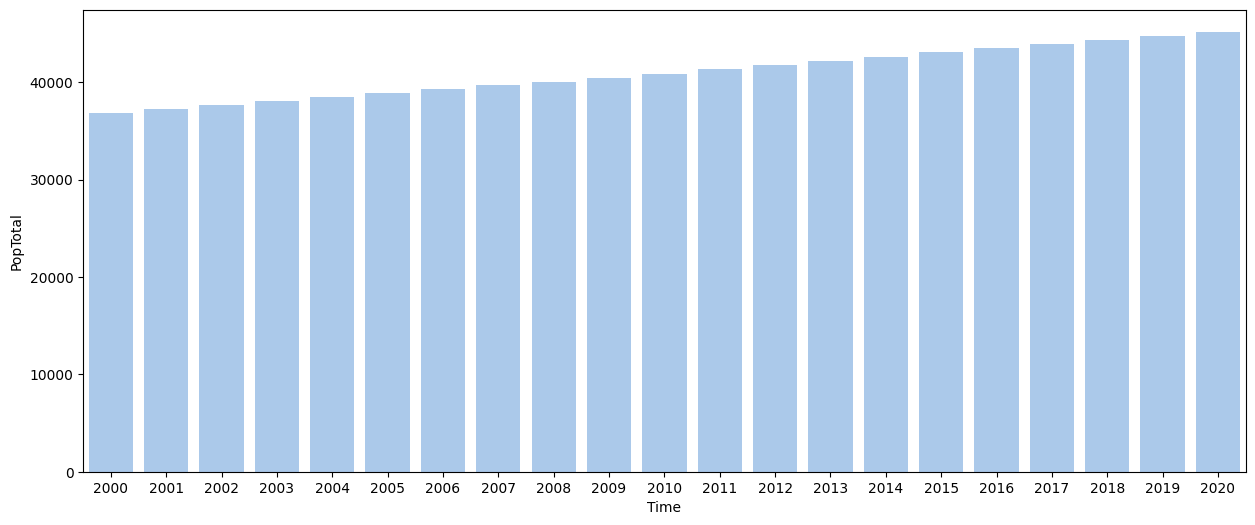

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
sns.barplot(x=Arg['Time'], y=Arg['PopTotal'], data=Arg,label="Mujeres", color="b")

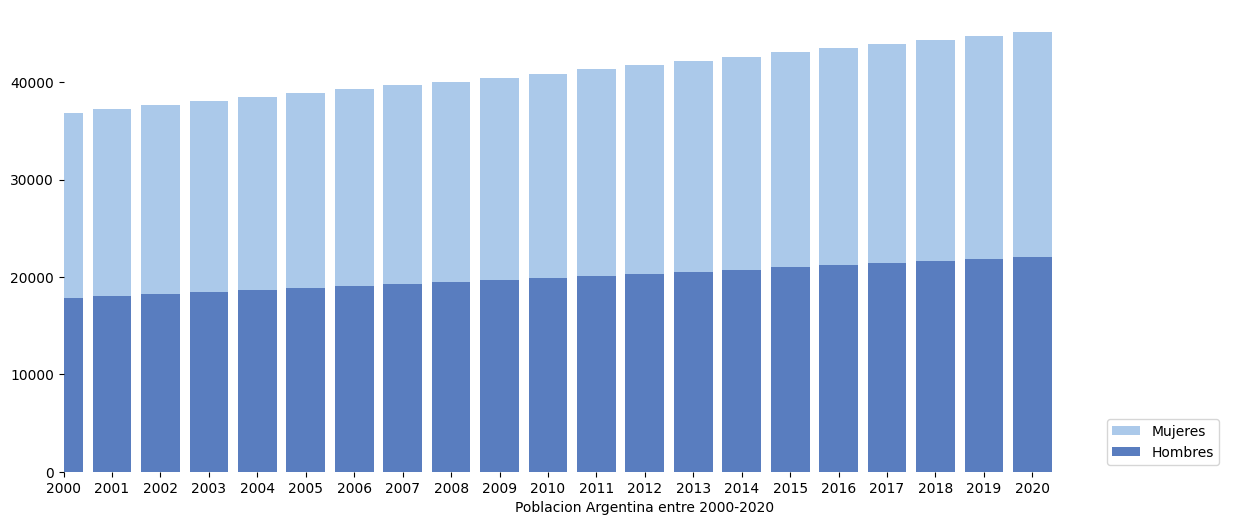

In [26]:
f, ax = plt.subplots(figsize=(15, 6))
sns.set_color_codes("pastel")
sns.barplot(x=Arg['Time'], y=Arg['PopTotal'], data=Arg,label="Mujeres", color="b")
sns.set_color_codes("muted")
sns.barplot(x=Arg['Time'], y=Arg['PopMale'], data=Arg,label="Hombres", color="b")
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Poblacion Argentina entre 2000-2020")
sns.despine(left=True, bottom=True)

In [27]:
paisesLimitrofes= [32,152,68,600, 76,858]
dfLimitrofes=df_poblT[df_poblT.LocID.isin(paisesLimitrofes)]
dfLimitrofes=dfLimitrofes.loc[df_poblT['Variant'] =='Medium']
dfLimitrofes=dfLimitrofes.loc[df_poblT['Time'] ==2022]
dfLimitrofes

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
9387,32,Argentina,2,Medium,2022,2022.5,22457.413,23552.821,46010.234,16.812
27262,68,Bolivia (Plurinational State of),2,Medium,2022,2022.5,6014.723,5977.924,11992.647,11.070
30798,76,Brazil,2,Medium,2022,2022.5,105731.316,109622.272,215353.588,25.766
47012,152,Chile,2,Medium,2022,2022.5,9495.704,9754.488,19250.192,25.890


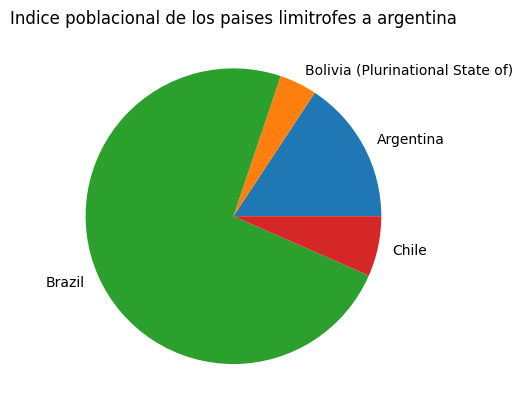

In [29]:
import matplotlib.pyplot as plt

cant = dfLimitrofes['PopTotal']
nombres = dfLimitrofes["Location"]
plt.title("cantidad poblacional de los paises limitrofes a argentina")
plt.pie(cant, labels=nombres)
plt.show()